In [251]:
from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
from scipy import stats
import numpy as np
import pandas as pd
import sys
import math
from matplotlib import pyplot as plt
import seaborn as sns
import random
from scipy.ndimage import laplace
from scipy.ndimage import gaussian_filter
from scipy.special import binom
from scipy.fft import fft2
random.seed(1234)

In [243]:
plt.rcParams.update({'lines.markersize': 12})

# Theory

In [252]:
def get_all_indices(rows,cols):
    indices = []
    for i in range(rows):
        for j in range(cols):
            indices.append((i, j))
    return indices

def get_theory_values(s_list=[1e-3,1e-2,1e-1],L=1,l=1,m=1e-2,Nd=1000,mu=1e-8):
    k_list = get_all_indices(L,L)
    Ntot = Nd*(L/l)**2
    ak_list = [m*(l**2)*((2*np.pi/L)**2)*(np.linalg.norm(k)**2) for k in k_list]
    result = np.zeros((len(s_list),len(k_list)))
    result_mean = np.zeros(len(s_list))
    for i in range(len(s_list)):
        for j in range(len(k_list)):
            result[i,j] = Ntot*mu*(1/s_list[i])*(1/(s_list[i]+ak_list[j]))
            if k_list[j]==(0,0):
                result_mean[i] = Ntot*mu*(1/s_list[i])
    # result_mean returns Ntot*mu/s
    # result returns Ntot*(mu/s)*(1/s+ak)
    return result_mean, result
    
def plot_mean_variance(result_mean,result,s_list=[1e-3,1e-2,1e-1]):
    L = np.shape(result)[1]
    plt.plot(s_list,result_mean,marker='x',linestyle='')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('s')
    plt.ylabel('mean')
    plt.title('Mean, L='+str(L))
    plt.show()
    
    if L==1:
        plt.plot(s_list,result,marker='x',linestyle='')
    else:
        plt.plot(s_list,result[:,0],marker='x',linestyle='')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('s')
    plt.ylabel('variance')
    plt.title('Variance, L='+str(L))
    plt.show()
    
# def plot_mean_variance_sims(result_mean,result,mean_sims,var_sims,s_list=[1e-3,1e-2,1e-1]):
#     L = np.sqrt(np.shape(result)[1])
    
#     plt.plot(s_list,result_mean,marker='x',linestyle='',label="theory")
#     plt.plot(s_list,mean_sims,marker='x',linestyle='',label="simulations")
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('s')
#     plt.ylabel('mean')
#     plt.title('Mean, L='+str(L))
#     plt.legend()
#     plt.show()
#     if L==1:
#         plt.plot(s_list,result,marker='x',linestyle='',label="theory")
#     else:
#         plt.plot(s_list,result[:,0],marker='x',linestyle='',label="theory")
#     plt.plot(s_list,var_sims,marker='x',linestyle='',label="simulations")
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('s')
#     plt.ylabel('variance')
#     plt.title('Variance, L='+str(L))
#     plt.legend()
#     plt.show()

## Single Deme

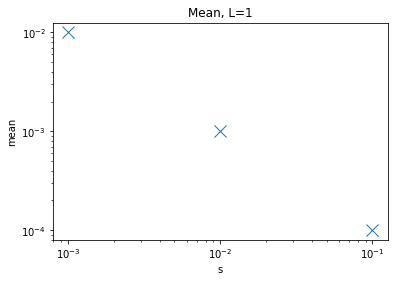

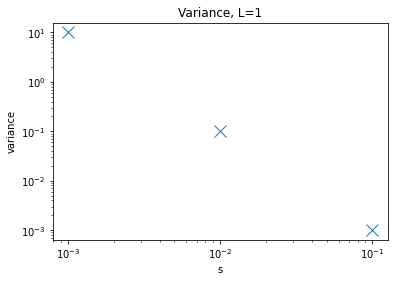

In [253]:
result_mean, result = get_theory_values()
plot_mean_variance(result_mean,result)

## 2x2 Grid

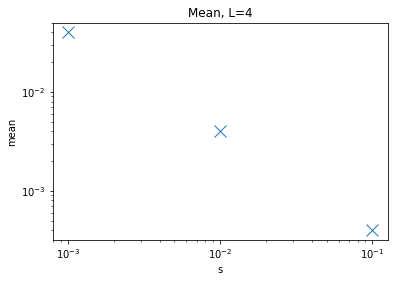

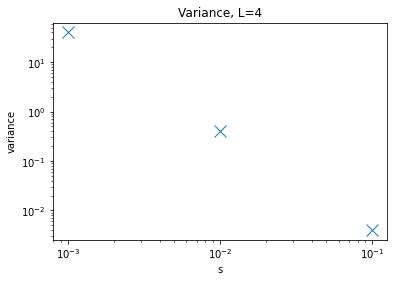

In [254]:
result_mean, result = get_theory_values(L=2)
plot_mean_variance(result_mean,result)

## 10x10 Grid

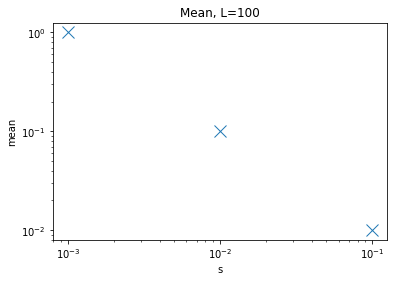

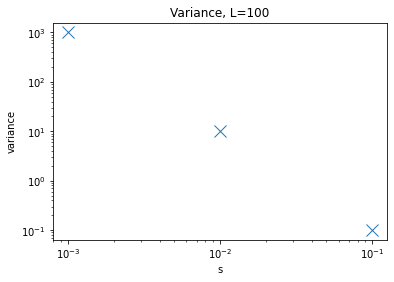

In [255]:
result_mean, result = get_theory_values(L=10)
plot_mean_variance(result_mean,result)

# Comparison to simulations

## Single deme

In [257]:
### read in data
## list of E[|C(k)|] **list1**
list1 = pd.read_csv('L1_list1.csv',header=None)
## list of |E[C(k)]|^2 **list2**
list2 = pd.read_csv('L1_list2.csv',header=None)
## list of E[|C(k)|^2] **list3**
list3 = pd.read_csv('L1_list3.csv',header=None)
## mean time to extinction
times = pd.read_csv('L1_times.csv',header=None)
## values of k
kvals = pd.read_csv('L1_k_list.csv',header=None)
## values of s
svals = pd.read_csv('L1_s_list.csv',header=None)

Text(0.5, 1.0, 'list 1')

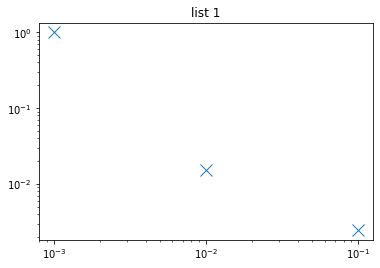

In [263]:
plt.plot(np.array(svals),np.array(list1),marker='x',linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.title("list 1")

Text(0.5, 1.0, 'list 2')

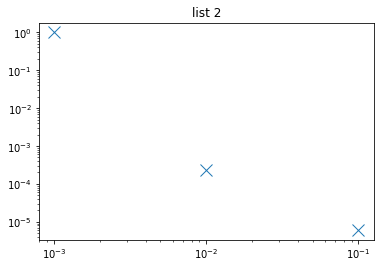

In [264]:
# check - should be 0 for k!=1
plt.plot(np.array(svals),np.array(list2),marker='x',linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.title("list 2")

Text(0.5, 1.0, 'list 3')

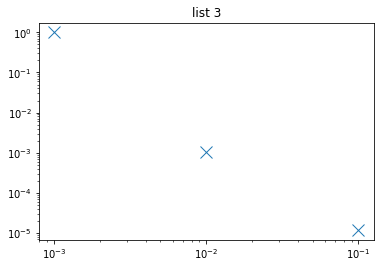

In [265]:
plt.plot(np.array(svals),np.array(list3),marker='x',linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.title("list 3")

In [ ]:

#mean_sims = np.array(list1) ## need to adjust w/ times & calc mu estimate
var_sims = np.array(list3-list2) # higher orders will need to filter to k=(0,0)
s_vals = np.array(svals)

Ntot = 1000

result_mean, result = get_theory_values(L=1,mu=1)

mean_sims_adj = mean_sims*np.array(times)*Ntot

prop = mean_sims_adj[2]/result_mean[2]#(Ntot/s_vals[0])

var_sims_adj = var_sims*np.array(times)*Ntot

prop_var = var_sims_adj[0]/result[0]

# result_mean, result = get_theory_values(L=1,mu=mu_est)
# print(mu_est)
plot_mean_variance_sims(result_mean*prop,result*prop_var,mean_sims_adj,var_sims_adj,s_list=s_vals)

print(prop)
print(prop_var)
print(prop/prop_var)

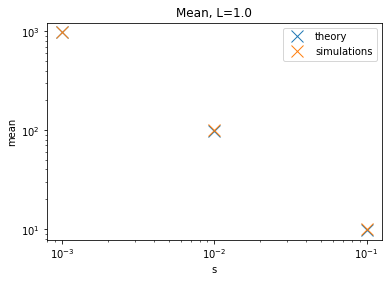

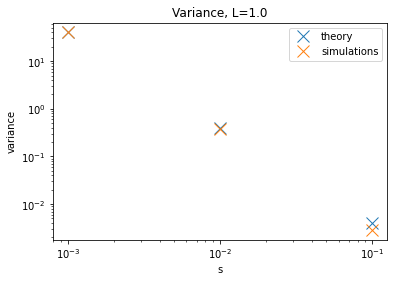

[0.00097432]
[4.00360742e-08]
[24336.15011292]


In [232]:
mean_sims = np.array(list1) ## need to adjust w/ times & calc mu estimate
var_sims = np.array(list3-list2) # higher orders will need to filter to k=(0,0)
s_vals = np.array(svals)

Ntot = 1000

result_mean, result = get_theory_values(L=1,mu=1)

mean_sims_adj = mean_sims*np.array(times)*Ntot

prop = mean_sims_adj[0]/result_mean[0]#(Ntot/s_vals[0])


var_sims_adj = var_sims*np.array(times)*Ntot

prop_var = var_sims_adj[0]/result[0]

# result_mean, result = get_theory_values(L=1,mu=mu_est)
# print(mu_est)
plot_mean_variance_sims(result_mean*prop,result*prop_var,mean_sims_adj,var_sims_adj,s_list=s_vals)

print(prop)
print(prop_var)
print(prop/prop_var)

## 3x3 grid

In [293]:
### read in data
list1 = pd.read_csv('L3_list1.csv',header=None)
list2 = pd.read_csv('L3_list2.csv',header=None)
list3 = pd.read_csv('L3_list3.csv',header=None)
times = pd.read_csv('L3_times.csv',header=None)
kvals = pd.read_csv('L3_k_list.csv',header=None)
svals = pd.read_csv('L3_s_list.csv',header=None)

result_mean, result = get_theory_values(L=3)

In [294]:
result

array([[9.00000000e+01, 2.00602215e+00, 5.10031660e-01, 2.00602215e+00,
        1.01431518e+00, 4.08488310e-01, 5.10031660e-01, 4.08488310e-01,
        2.55740473e-01],
       [9.00000000e-01, 1.67084662e-01, 4.85280803e-02, 1.67084662e-01,
        9.20906258e-02, 3.92456905e-02, 4.85280803e-02, 3.92456905e-02,
        2.49363246e-02],
       [9.00000000e-03, 6.25586885e-03, 3.26726638e-03, 6.25586885e-03,
        4.79412389e-03, 2.81844920e-03, 3.26726638e-03, 2.81844920e-03,
        1.99592270e-03]])

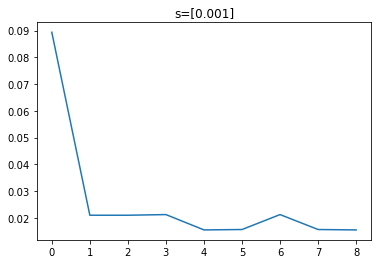

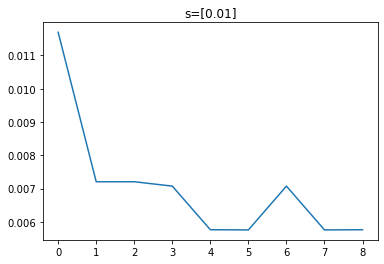

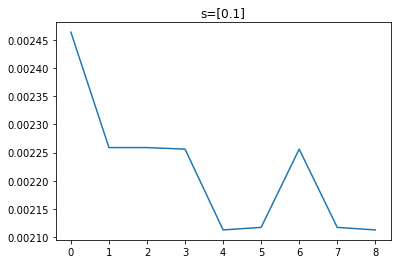

In [295]:
### plot list 1
list1_s0 = np.array(list1)[0,:]
list1_s1 = np.array(list1)[1,:]
list1_s2 = np.array(list1)[2,:]

plt.plot(range(len(np.array(kvals))),list1_s0)
plt.title("s="+str(np.array(svals)[0]))
plt.show()

plt.plot(range(len(np.array(kvals))),list1_s1)
plt.title("s="+str(np.array(svals)[1]))
plt.show()

plt.plot(range(len(np.array(kvals))),list1_s2)
plt.title("s="+str(np.array(svals)[2]))
plt.show()


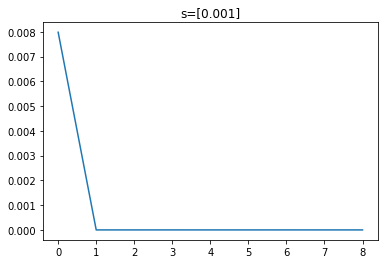

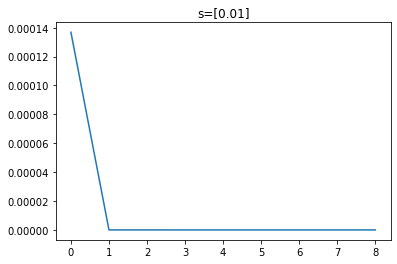

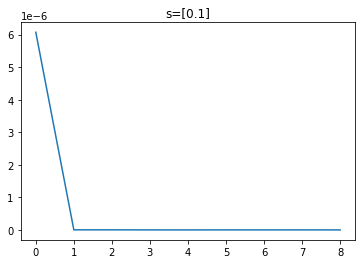

In [290]:
### plot list 2 (sero for k>0)
list2_s0 = np.array(list2)[0,:]
list2_s1 = np.array(list2)[1,:]
list2_s2 = np.array(list2)[2,:]

plt.plot(range(len(np.array(kvals))),list2_s0)
plt.title("s="+str(np.array(svals)[0]))
plt.show()

plt.plot(range(len(np.array(kvals))),list2_s1)
plt.title("s="+str(np.array(svals)[1]))
plt.show()

plt.plot(range(len(np.array(kvals))),list2_s2)
plt.title("s="+str(np.array(svals)[2]))
plt.show()


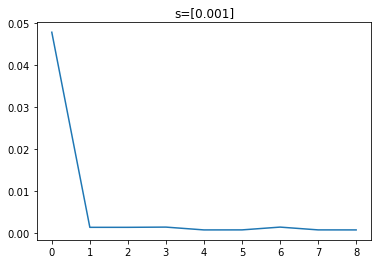

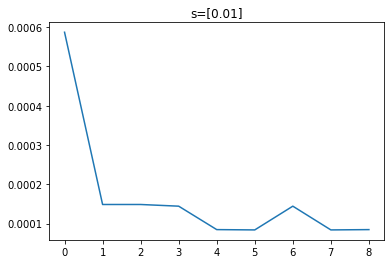

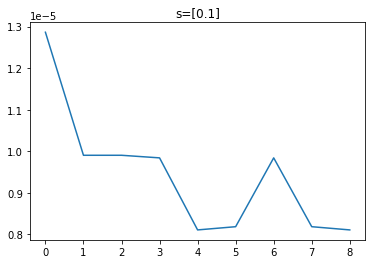

In [291]:
### plot list 3
list3_s0 = np.array(list3)[0,:]
list3_s1 = np.array(list3)[1,:]
list3_s2 = np.array(list3)[2,:]

plt.plot(range(len(np.array(kvals))),list3_s0)
plt.title("s="+str(np.array(svals)[0]))
plt.show()

plt.plot(range(len(np.array(kvals))),list3_s1)
plt.title("s="+str(np.array(svals)[1]))
plt.show()

plt.plot(range(len(np.array(kvals))),list3_s2)
plt.title("s="+str(np.array(svals)[2]))
plt.show()


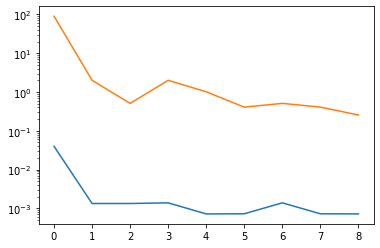

In [308]:
val_s0 = np.array(list3)[0,:]-np.array(list2)[0,:]
result_s0 = result[0]

plt.plot(range(len(np.array(kvals))),val_s0)
plt.plot(range(len(np.array(kvals))),result_s0)
# plt.plot(range(len(np.array(kvals))),list3_s0)
plt.yscale('log')

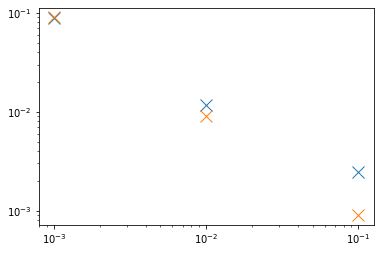

In [320]:
mean_vals = np.array(list1)[:,0]
mean_vals
svals = np.array(svals)
plt.plot(svals,mean_vals,marker='x',linestyle='')
plt.plot(svals,result_mean,marker='x',linestyle='')
plt.yscale('log')
plt.xscale('log')

In [292]:
# mean_sims = np.array(list1)[:,0] ## need to adjust w/ times & calc mu estimate
# var_sims = np.array(list3)[:,0]-np.array(list2)[:,0] # higher orders will need to filter to k=(0,0)
# s_vals = np.array(svals)

# times = np.array(times)
# times = [sublist[0] for sublist in times]
# # times = [times[0],times[1],times[2]]

# # print(times)

# Ntot = 9000

# result_mean, result = get_theory_values(L=3,mu=1)

# print(result)

# mean_sims_adj = mean_sims*np.array(times)*Ntot

# prop = mean_sims_adj[0]/result_mean[0]#(Ntot/s_vals[0])


# var_sims_adj = var_sims*np.array(times)*Ntot

# prop_var = var_sims_adj[0]/result[0,0]

# # result_mean, result = get_theory_values(L=1,mu=mu_est)
# # print(mu_est)
# plot_mean_variance_sims(result_mean*prop,result*prop_var,mean_sims_adj,var_sims_adj,s_list=s_vals)

# print(prop)
# print(prop_var)
# # print(prop/prop_var)

# Simulations with sampling